# Machine Learning Project

##### Imports

In [60]:
%pylab inline
import scipy.io as sio
from sklearn.neighbors import NearestNeighbors
from sklearn import svm, grid_search
from sklearn.cross_validation import cross_val_predict, cross_val_score
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


##### Load Data

In [11]:
data = sio.loadmat("../subjects/Matlab_Vowels/goals_responses_testcase.mat")

In [15]:
data.keys()

['__header__',
 '__globals__',
 'respy',
 'respx',
 '__version__',
 'goalx',
 'goaly']

##### Define some variables

In [24]:
gX, gY, rX, rY = data["goalx"], data["goaly"], data["respx"], data["respy"]

In [45]:
tmpY = gX + gY
mapper = {val: i for i, val in enumerate(sorted(list(set(tmpY[:,0]))))}
print "mapping is", mapper
y = [mapper[Y] for Y in tmpY[:,0]] 
X = np.hstack((rX, rY))

mapping is {2314: 1, 2548: 2, 1791: 0}


In [76]:
np.hstack((gX,gY,tmpY))[:10]

array([[1089,  702, 1791],
       [1089,  702, 1791],
       [2254,  294, 2548],
       [1089,  702, 1791],
       [1089,  702, 1791],
       [1763,  551, 2314],
       [1089,  702, 1791],
       [1089,  702, 1791],
       [1089,  702, 1791],
       [1089,  702, 1791]], dtype=uint16)

In [77]:
vowel_mapper = {1791: "aah", 2548: "ee", 2314: "eh"}

##### Define an SVM and grid search over parameters in a cross validation

the predicted y is the cross-validated y

In [59]:
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svr = svm.SVC()
clf = grid_search.GridSearchCV(svr, parameters)
y_pred = cross_val_predict(clf, X, y)

##### Plotting functions

In [78]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(mapper.keys()))
    foo = [vowel_mapper[q] for q in sorted(mapper.keys())]
    plt.xticks(tick_marks, foo, rotation=45)
    plt.yticks(tick_marks, foo)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

##### Show confusion matrix

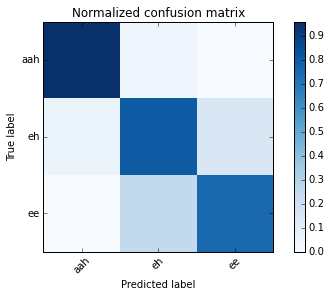

In [79]:
cm = confusion_matrix(y, y_pred)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

In [84]:
cm

array([[47,  2,  0],
       [ 2, 28,  5],
       [ 0,  9, 27]])

to megan: add coordinates of goal. sort them. 0 corresponds to the lowest addition "ah", 1 is "eh" 

In [82]:
sio.savemat("s12_pred.mat", {"y_pred": y_pred})